In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [287]:
from statistics import mean

In [288]:
data = pd.read_csv('Quantities.csv') 

In [289]:
data.head()

,Mix ID,Cement(in kg),Coarse Aggregate(kg),Fine Aggregate(kg),Total(W/C) ratio,Total Water(in kg),Super Plasticizer(.5%),Steel Fibre(kg),Palm Data Fiber(kg),PP Fiber(kg),Fresh Density(kg/m3),Vf
0,M0,400,1105.4,736.93,0.441,176.4,2,0.0,0.00,0.0,2420.73,0.0
1,M1,400,1105.4,736.93,0.441,176.4,2,15.7,NaN,NaN,2436.43,0.2
2,M2,400,1105.4,736.93,0.441,176.4,2,47.1,NaN,NaN,2467.83,0.6
3,M3,400,1105.4,736.93,0.441,176.4,2,78.5,NaN,NaN,2499.23,1.0
4,M4,400,1105.4,736.93,0.441,176.4,2,NaN,1.84,NaN,2422.57,0.2


#  Calculate the Percent change wrt to Mo

In [290]:
def Change(dataset):
    dataset['Percent Change']=""
    s= data1['Average'].size
    for i in range(s):
        dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100
    return 


# Material plot wrt to Volume fraction taking into account the sample variablity 

In [291]:
def plot(dataset,i,I):
    if i!=5:
     dataset['SD']= dataset[['S1','S2','S3']].std(axis=1) 
    else:
     dataset['SD']= dataset[['S1','S2']].std(axis=1)
    x = np.arange(3)
    y = 0
    P = [dataset['Average']['M1'],dataset['Average']['M2'],dataset['Average']['M3']]
    Q = [ dataset['Average']['M4'],dataset['Average']['M5'],dataset['Average']['M6']]
    R= [ dataset['Average']['M7'],dataset['Average']['M8'],dataset['Average']['M9']]
    c1=[dataset['SD']['M1'],dataset['SD']['M2'],dataset['SD']['M3']]
    c2 = [ dataset['SD']['M4'],dataset['SD']['M5'],dataset['SD']['M6']]
    c3= [ dataset['SD']['M7'],dataset['SD']['M8'],dataset['SD']['M9']]
    print(c1)
    print(c2)
    print(c3)
    width = 0.2
    plt.plot(x-0.2, P, width, color='cyan')
    plt.plot(x, Q, width, color='orange')
    plt.plot(x+0.2, R, width, color='green')
    plt.errorbar(x-0.2, P, yerr=c1, fmt="o", color="r")
    plt.errorbar(x, Q, yerr=c2, fmt="o", color="blue")
    plt.errorbar(x+0.2, R, yerr=c3, fmt="o", color="black")
    width = 0.2
    width = 0.2
    width = 0.2
    plt.xlabel("Materials")
    plt.ylabel(I[i])
    plt.xticks(x, ['VF1', 'VF2', 'VF3'])
    plt.legend(['SF', 'DPE', 'PPE'],loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
    

    plt.show()
    return P,Q,R

In [292]:
I1 = ['CS', 'D', 'USPV', 'FS', 'WP', 'WA']

In [293]:
Iall = ['CS','D','WA','USPV','FS']

# Test 1 :Water curing 

# Result 1:Compressive Strength

In [294]:
data1 =  pd.DataFrame({
    "S1":[64.641,58.39,62.53,60.1,59.1,54.5,70.8,71.03,64.27,54.6],
    "S2":[64.04,67.19,62.34,65.3,57.2,55.4,72.34,71.63,50.3,56.6],
    "S3":[64.89,66.83,66.4,64.3,58.1,55.1,64.38,67.55,68.86,66.2],
    "Average":[64.5,64.1,63.8,63.2,58.1,55.0,69.2,70.1,66.6,55.6],
    "SD" : [0.436978642,4.980013387,2.291164187,2.759226945,0.950438495,0.458257569,4.221958471,2.20290717,3.245620126,1.414213562]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data1.head()

,S1,S2,S3,Average,SD
M0,64.641,64.04,64.89,64.5,0.436979
M1,58.390,67.19,66.83,64.1,4.980013
M2,62.530,62.34,66.40,63.8,2.291164
M3,60.100,65.30,64.30,63.2,2.759227
M4,59.100,57.20,58.10,58.1,0.950438


In [295]:
rowdata1 = data1.loc[ 'M8' , :]

In [296]:
rowdata1['S2'] = (rowdata1['S1']+ rowdata1['S3'])/2
rowdata1['S2']

66.565

In [297]:
rowdata11 = data1.loc[ 'M9' , :]

In [298]:
rowdata11['S3'] = (rowdata11['S1'] + rowdata11['S2'])/2
print(rowdata11)

S1         54.600000
S2         56.600000
S3         55.600000
Average    55.600000
SD          1.414214
Name: M9, dtype: float64


In [299]:
rowdata1['Average']= (rowdata1['S1'] + rowdata1['S2'] + rowdata1['S3'])/3
rowdata1['Average']

66.565

In [300]:
rowdata11['Average']= (rowdata11['S1'] + rowdata11['S2'] + rowdata11['S3'])/3
rowdata11['Average']

55.6

In [301]:
 
rowdata1['SD'] = np.array([rowdata1['S1'] , rowdata1['S2'],rowdata1['S3']]).std()
rowdata1['SD']

1.8738596532291325

In [302]:
rowdata11['SD'] = np.array([rowdata11['S1'] , rowdata11['S2'],rowdata11['S3']]).std()
rowdata11['SD']

0.816496580927726

# VF1 - PPE, VF2-PPE, VF3-DPE as per VF
   

In [303]:
SF1= (data1['Average']['M1'] + data1['Average']['M2'] + data1['Average']['M3'])/3
SF1

63.699999999999996

In [304]:
DPE1= (data1['Average']['M4'] + data1['Average']['M5'] + data1['Average']['M6'])/3
DPE1

60.76666666666667

In [305]:
PPE1= (data1['Average']['M7'] + data1['Average']['M8'] + data1['Average']['M9'])/3
PPE1

64.08833333333332

# DPE< SF< PPE in comparitive Strength  across materials (Overall)


In [306]:
 Change(data1)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

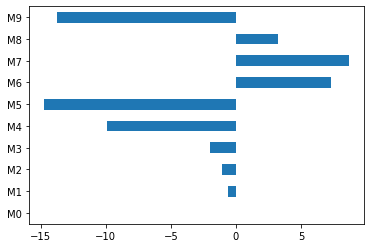

In [307]:
data1['Percent Change'].plot(kind = 'barh')

# Comp Strength :M7 ( PPE - VF (0.2)  is maximum while of M5( DPE - 0.6) is minimum

# Comp Strength :Maximum Increase  of M7,Maximum decrease M5 wrt to M0

# Result 2: Density

In [308]:
data2 =  pd.DataFrame({
   "S1":[2512.4,2543.2,2501.4,2589.9,2537.4,2508.1,2493.3,2485.5,2496.6,2555.7],
   "S2":[2509.2,2498.5,2556.9,2586.0,2535.6,2518.0,2507.3,2550.7,2471.6,2420.1],
   "S3":[2520.5,2516.3,2526.9,2589.4,2530.4,2514.5,2488.4,2450.6,2461.5,2502.4],
   "Average":[2514.0,2519.3,2528.4,2588.4,2534.5,2513.5,2496.3,2495.6,2476.6,2492.7]
},index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data2.head()

,S1,S2,S3,Average
M0,2512.4,2509.2,2520.5,2514.0
M1,2543.2,2498.5,2516.3,2519.3
M2,2501.4,2556.9,2526.9,2528.4
M3,2589.9,2586.0,2589.4,2588.4
M4,2537.4,2535.6,2530.4,2534.5


In [309]:
data2

,S1,S2,S3,Average
M0,2512.4,2509.2,2520.5,2514.0
M1,2543.2,2498.5,2516.3,2519.3
M2,2501.4,2556.9,2526.9,2528.4
M3,2589.9,2586.0,2589.4,2588.4
M4,2537.4,2535.6,2530.4,2534.5
M5,2508.1,2518.0,2514.5,2513.5
M6,2493.3,2507.3,2488.4,2496.3
M7,2485.5,2550.7,2450.6,2495.6
M8,2496.6,2471.6,2461.5,2476.6
M9,2555.7,2420.1,2502.4,2492.7


#  VF1 - DPE, VF2-SF, VF3-PPE (as per VF)
  

In [310]:
SF2= (data2['Average']['M1'] + data2['Average']['M2'] + data2['Average']['M3'])/3
SF2

2545.366666666667

In [311]:
DPE2= (data2['Average']['M4'] + data2['Average']['M5'] + data2['Average']['M6'])/3
DPE2

2514.766666666667

In [312]:
PPE2= (data2['Average']['M7'] + data2['Average']['M8'] + data2['Average']['M9'])/3
PPE2

2488.2999999999997

# PPE < DPE < SF in Density (Overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

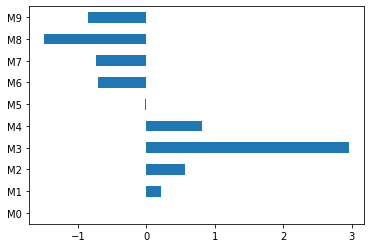

In [313]:
Change(data2)
data2['Percent Change'].plot(kind = 'barh')

#  Density: Range of Values is less.M3 is maximum out of all the values ( SF- V3) best performance 



# Density :Maximum percent increase in M3 ,Maximum percent decrease in M8

# Result 3 :USPV

In [314]:
data3 =  pd.DataFrame({
    "S1":[5.076142,5.050505,4.926108,4.739336,5.050505,4.950495,4.926108,4.830918,4.291845,4.651163],
    "S2":[5,5.181347,5,4.926108,5.076142,4.950495,5.025126,4.854369,4.761905,4.830918],
    "S3":[5.025126,5.076142,4.830918,4.784689,5.050505,5,4.901961,4.950495,5.050505,4.878049],
    "Average":[5.03,5.1,4.92,4.82,5.06,4.97,4.95,4.88,4.7,4.79]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data3.head()

,S1,S2,S3,Average
M0,5.076142,5.000000,5.025126,5.03
M1,5.050505,5.181347,5.076142,5.10
M2,4.926108,5.000000,4.830918,4.92
M3,4.739336,4.926108,4.784689,4.82
M4,5.050505,5.076142,5.050505,5.06


In [315]:
data3

,S1,S2,S3,Average
M0,5.076142,5.000000,5.025126,5.03
M1,5.050505,5.181347,5.076142,5.10
M2,4.926108,5.000000,4.830918,4.92
M3,4.739336,4.926108,4.784689,4.82
M4,5.050505,5.076142,5.050505,5.06
M5,4.950495,4.950495,5.000000,4.97
M6,4.926108,5.025126,4.901961,4.95
M7,4.830918,4.854369,4.950495,4.88
M8,4.291845,4.761905,5.050505,4.70
M9,4.651163,4.830918,4.878049,4.79


# VF1 - SF, VF2-DPE,VF3-DPE(as per VF)

In [316]:
SF3= (data3['Average']['M1'] + data3['Average']['M2'] + data3['Average']['M3'])/3
SF3

4.946666666666666

In [317]:
DPE3= (data3['Average']['M4'] + data3['Average']['M5'] + data3['Average']['M6'])/3
DPE3

4.993333333333333

In [318]:
PPE3 = (data3['Average']['M7'] + data3['Average']['M8'] + data3['Average']['M9'])/3

PPE3

4.79

# Across materials : PPE< SF< DPE(overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

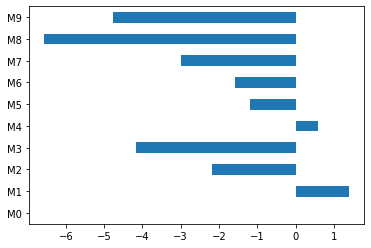

In [319]:
Change(data3)
data3['Percent Change'].plot(kind = 'barh')

# USPV : Maximum M1(SF- VF1),Minimum M8(MI penultimate)

# USPV : Percent increase M1,while minimum is of M8

# Result 4:Flexure

In [320]:
data4 =  pd.DataFrame({
    "S1":[5.1756,6.075,10.089,13.803,9.003,9.603,9.603,9.003,8.349,9.183],
    "S2":[5.2938,6.117,8.682,15.519,8.403,8.91,9.003,8.703,8.403,9.003],
    "S3":[5.1375,7.785,7.353,9.303,7.518,9.003,8.403,9.303,8.403,8.703],
    "Average":[5.2,6.7,8.7,12.9,8.3,9.2,9.0,9.0,8.4,9.0]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data4.head()

,S1,S2,S3,Average
M0,5.1756,5.2938,5.1375,5.2
M1,6.0750,6.1170,7.7850,6.7
M2,10.0890,8.6820,7.3530,8.7
M3,13.8030,15.5190,9.3030,12.9
M4,9.0030,8.4030,7.5180,8.3


# VF1 -PPE,VF2-DPE,VF3-SF

In [321]:
SF4= (data4.Average[1]+data4.Average[2]+data4.Average[3])/3
SF4

9.433333333333332

In [322]:
DPE4= (data4.Average[4]+data4.Average[5]+data4.Average[6])/3
DPE4

8.833333333333334

In [323]:
PPE4= (data4.Average[7]+data4.Average[8]+data4.Average[9])/3
PPE4

8.799999999999999

# PPE< DPE< SF in Flexure Strength (Overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

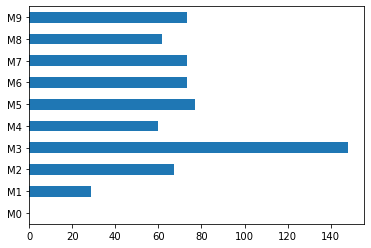

In [324]:

Change(data4)
data4['Percent Change'].plot(kind = 'barh')

# Flexure Strength: M3 is maximum while M0 is minimum (M1 is minimum of 3 materials)

# Result 5:Water Permeability

In [325]:
data5=  pd.DataFrame({
    "S1":[5.25,2,4.75,5.5,4.5,9,10.5,4,4.5,5.25],
    "S2":[4.75,4,4,5.5,5.25,8.5,12.75,4.5,5.25,5.5],
    "S3":[4,4,4,6.5,6.25,10,10.75,4,5,5.5],
    "Average":[4.7,3.3,4.3,5.8,5.3,9.2,11.3,4.2,4.9,5.4]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data5.head()

,S1,S2,S3,Average
M0,5.25,4.75,4.00,4.7
M1,2.00,4.00,4.00,3.3
M2,4.75,4.00,4.00,4.3
M3,5.50,5.50,6.50,5.8
M4,4.50,5.25,6.25,5.3


# Water permeability : VF1-DPE,VF2-DPE,VF3-DPE; DPE - Best performer across all volume fraction.


In [326]:
SF5= (data5.Average[1]+data5.Average[2]+data5.Average[3])/3
SF5

4.466666666666666

In [327]:
DPE5= (data5.Average[4]+data5.Average[5]+data5.Average[6])/3
DPE5

8.6

In [328]:
PPE5 = (data5.Average[7]+data5.Average[8]+data5.Average[9])/3
PPE5

4.833333333333334

# SF< PPE< DPE(Overall); SF and PPE close to each other

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

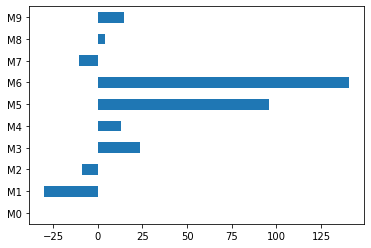

In [329]:
Change(data5)
data5['Percent Change'].plot(kind = 'barh')

# Water Permeability : Maximum in M6( DPE-1) while minimum in M1( across materials)

# Water permeability:Maximum increase percent in M6, decrease percent in M1

# Water absorption

# Lack of data (Sample 3) 

# Result 6

In [330]:
data6=  pd.DataFrame({
    "S1":[1.582042,1.546487,1.472658,1.723559,1.69406,1.74174,1.825342,1.939161,1.639865,2.166622],
    "S2":[1.784286,1.559397,1.503484,1.786085,1.652366,1.684627,1.740515,1.885321,2.085597,2.115846],
    "Average":[1.68,1.55,1.49,1.75,1.67,1.71,1.78,1.91,1.86,2.14]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data6.head()

,S1,S2,Average
M0,1.582042,1.784286,1.68
M1,1.546487,1.559397,1.55
M2,1.472658,1.503484,1.49
M3,1.723559,1.786085,1.75
M4,1.694060,1.652366,1.67


# VF1 - PPE,VF2 - PPE,VF3-PPE; PPE best performer across all voulmes

In [331]:
SF6= (data6.Average[1]+data4.Average[2]+data4.Average[3])/3
SF6

7.716666666666666

In [332]:
DPE6= (data6.Average[4]+data4.Average[5]+data4.Average[6])/3
DPE6

6.623333333333332

In [333]:
PPE6= (data6.Average[7]+data4.Average[8]+data4.Average[9])/3
PPE6

6.436666666666667

# SF< DPE< PPE in Water absorption(Overall)

# Water absorption:Maximum in M9(PPE- VF3),minimum in M2

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

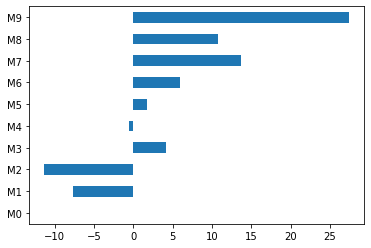

In [334]:
Change(data6)
data6['Percent Change'].plot(kind = 'barh')


# Water absorption:  Maximum percent change in M9 while M2 has minimum percent change

[4.980013386862862, 2.291164187336504, 2.759226944876648]
[0.9504384952922162, 0.45825756949558355, 4.2219584712942595]
[2.2029071700822986, 2.2950000000000017, 1.0]


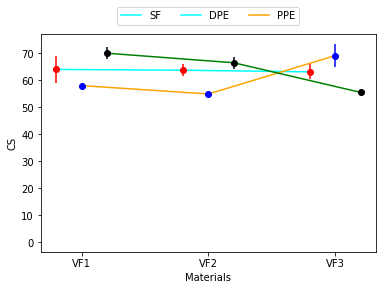

[22.503851522202336, 27.780388766178202, 2.122105872319653]
[3.635014901390795, 5.020292156173167, 9.808329793259098]
[50.808562270546425, 18.069403236779348, 68.31488368820757]


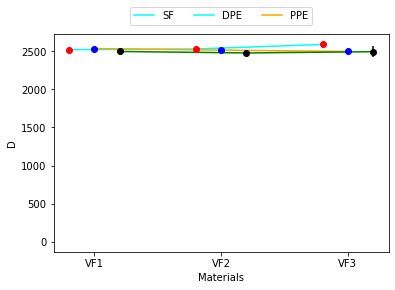

[0.06933610982982316, 0.08476426771543166, 0.09741663799885536]
[0.014801528851214257, 0.028581725076232373, 0.06526517595931242]
[0.06336247076148484, 0.3829297932171552, 0.11972917228896188]


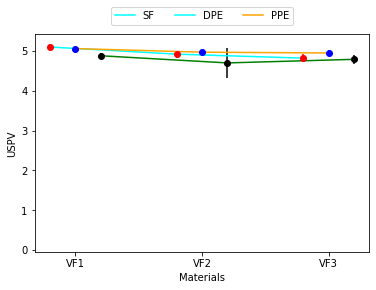

[0.9753706987602201, 1.3681852944685529, 3.210226160257249]
[0.7470441754006254, 0.3761422603218094, 0.5999999999999996]
[0.3000000000000007, 0.03117691453623995, 0.24248711305964307]


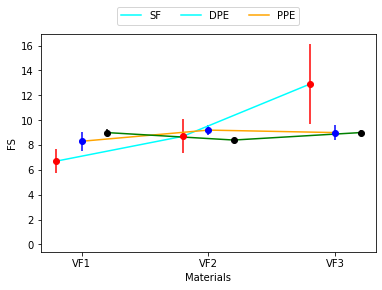

[1.1547005383792515, 0.4330127018922193, 0.5773502691896258]
[0.8779711460710616, 0.7637626158259733, 1.233220715579062]
[0.28867513459481287, 0.3818813079129867, 0.14433756729740646]


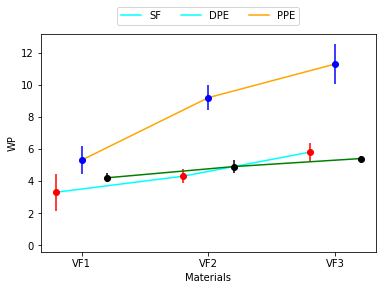

[0.009128748545118312, 0.02179727363685653, 0.04421255860046997]
[0.02948211013479184, 0.04038498959390727, 0.05998174692771126]
[0.03807062909908364, 0.31518011979184224, 0.03590405392152809]


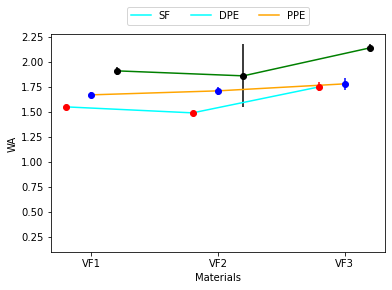

([1.55, 1.49, 1.75], [1.67, 1.71, 1.78], [1.91, 1.86, 2.14])

In [335]:
plot(data1,0,I1)
plot(data2,1,I1)
plot(data3,2,I1)
plot(data4,3,I1)
plot(data5,4,I1)
plot(data6,5,I1)

# Correlation of all the materials wrt to attributes and also the correlation wrt to the Grouped material .


In [336]:
train = (data1['Average'],data2['Average'],data3['Average'],data4['Average'],data5['Average'],data6['Average'])

In [337]:
D = pd.DataFrame(train,columns=['M0','M1','M2','M3','M4','M5','M6','M7','M8','M9'],index =['CS','D','USPV','FS','WP','WA'])

In [338]:
DT = D.T


<AxesSubplot:>

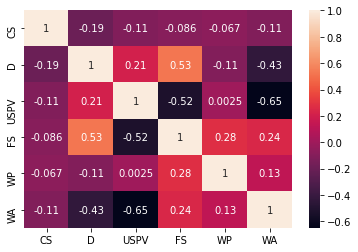

In [339]:
corr = DT.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [340]:
dataF = pd.DataFrame({
"material 1":[SF1,SF2,SF3,SF4,SF5,SF6],
"material 2":[DPE1,DPE2,DPE3,DPE4,DPE5,DPE6],
"material 3":[PPE1,PPE2,PPE3,PPE4,PPE5,PPE6],
},
index =['CS','D','USPV','FS','WP','WA'])
dataF.head()


,material 1,material 2,material 3
CS,63.700000,60.766667,64.088333
D,2545.366667,2514.766667,2488.300000
USPV,4.946667,4.993333,4.790000
FS,9.433333,8.833333,8.800000
WP,4.466667,8.600000,4.833333


In [341]:
dataF1= dataF.T

<AxesSubplot:>

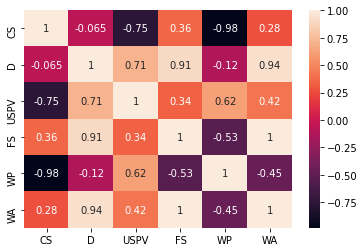

In [342]:
corr = dataF1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

# Across the Materials (M0-M9)  attributes trend  D-FS(+),USPV-WA(-),USPV-FS(-),D-WA(-)



# Across the Grouped material i.e SF,DPE and PPE attributes trend

#  CS-USPV (-), CS-WP(-),D-USPV(+),D-FS(+)(both true),  D-WA(+)(anomaly),      USPV-WP(+),WA-FS(perfect +)

#  Test 2 :Heat Cool cycle

# 1.Comp Strength

In [343]:
data11=  pd.DataFrame({
    "S1":[77.27,77.23,68.82,59.38,74.88,63.77,68.21,61.4,73.85,72.9],
    "S2":[76.9,74.03,74.87,52.76,61.73,68.2,68,73.2,64.54,73.6],
    "S3":[65.85,70.13,78,67.66,74.18,63.83,75.1,69.4,73.1,69.93],
    "Average":[73.3,73.8,73.9,59.9,70.3,65.3,70.4,68.0,70.5,72.1],
    "SD" : [6.489167897,3.555746523,4.666758332,7.465395725,7.398366937,2.54051832,4.039929867,6.023288139,5.172236782,1.948495146
]
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data11.head()

,S1,S2,S3,Average,SD
M0,77.27,76.90,65.85,73.3,6.489168
M1,77.23,74.03,70.13,73.8,3.555747
M2,68.82,74.87,78.00,73.9,4.666758
M3,59.38,52.76,67.66,59.9,7.465396
M4,74.88,61.73,74.18,70.3,7.398367


# Comp strength - SF(VF1),SF(VF2),PPE(VF3)

In [344]:
SF11= (data11['Average']['M1'] + data11['Average']['M2'] + data11['Average']['M3'])/3
SF11

69.2

In [345]:
DPE11= (data11.Average[4]+data11.Average[5]+data11.Average[6])/3
DPE11

68.66666666666667

In [346]:
PPE11= (data11.Average[7]+data11.Average[8]+data11.Average[9])/3
PPE11

70.2

# DPE< SF< PPE(Overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

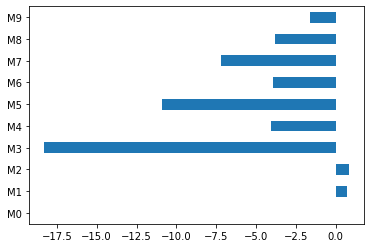

In [347]:

Change(data11)
data11['Percent Change'].plot(kind = 'barh')


# Comp Strength: M2 (SF-VF2) maximum increase while M3 maximum decrease.

# 2.Density

In [348]:
data12=  pd.DataFrame({
    "S1":[2397.8,2430.6,2433.0,2545.6,2456.3,2414.6,2416.4,2410.7,2359.4,2431.5],
    "S2":[2464.0,2413.0,2429.7,2542.6,2488.1,2406.4,2462.5,2435.9,2411.3,2474.1],    
    "S3":[2454.1,2432.4,2425.8,2506.0,2472.6,2403.0,2476.8,2422.1,2390.8,2383.7],
    "Average":[2438.6,2425.3,2429.5,2531.4,2472.3,2408.0,2451.9,2422.9,2387.2,2429.8],
    
     }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data12.head()

,S1,S2,S3,Average
M0,2397.8,2464.0,2454.1,2438.6
M1,2430.6,2413.0,2432.4,2425.3
M2,2433.0,2429.7,2425.8,2429.5
M3,2545.6,2542.6,2506.0,2531.4
M4,2456.3,2488.1,2472.6,2472.3


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

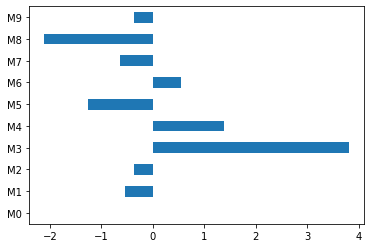

In [349]:
Change(data12)
data12['Percent Change'].plot(kind = 'barh')


# M3(SF-V3) maximum increase and M8 maximum dip

# VF1-DPE,VF2-SF,VF3-SF(across volume fractions)

In [350]:
SF12= (data12['Average']['M1'] + data12['Average']['M2'] + data12['Average']['M3'])/3
SF12

2462.066666666667

In [351]:
DPE12= (data12['Average']['M4'] + data12['Average']['M5'] + data12['Average']['M6'])/3
DPE12

2444.066666666667

In [352]:
PPE12= (data12['Average']['M7'] + data12['Average']['M8'] + data12['Average']['M9'])/3
PPE12

2413.3

# PPE< DPE< SF(Overall)

# 3. Water Absorption

In [353]:
data13=  pd.DataFrame({
    "S1":[1.320256507,1.466517949,1.717446949,1.589931747,1.73237998,1.889147803,1.716541978,1.708333333,1.647720015,1.689035722],
    "S2":[1.374108053,1.481913167,1.678379496,1.598918145,1.730885616,1.844587263,1.447089516,1.731601732,1.507265687,1.554067762],    
    "S3":[1.36302239,1.515777301,1.755766284,1.647030536,1.695740365,1.839926403,1.418267283,1.724638282,1.545569089,1.714694978],    
    "Average":[1.352462317,1.488069472,1.697913222,1.594424946,1.731632798,1.866867533,1.581815747,1.719967532,1.577492851,1.621551742],
      }, index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data13.head()

,S1,S2,S3,Average
M0,1.320257,1.374108,1.363022,1.352462
M1,1.466518,1.481913,1.515777,1.488069
M2,1.717447,1.678379,1.755766,1.697913
M3,1.589932,1.598918,1.647031,1.594425
M4,1.732380,1.730886,1.695740,1.731633


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

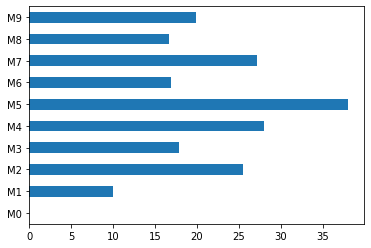

In [354]:
Change(data13)
data13['Percent Change'].plot(kind = 'barh')


# M5(DPE-VF2) maximum , M1(excluded M0 ) minimum

# VF1-DPE,VF2-DPE,VF3-PPE(across volume fractions)

In [355]:
SF13= (data13['Average']['M1'] + data13['Average']['M2'] + data13['Average']['M3'])/3
SF13

1.5934692133333332

In [356]:
DPE13= (data13['Average']['M4'] + data13['Average']['M5'] + data13['Average']['M6'])/3
DPE13

1.726772026

In [357]:
PPE13= (data13['Average']['M7'] + data13['Average']['M8'] + data13['Average']['M9'])/3
PPE13

1.6396707083333333

# SF< PPE< DPE(overall)

# 4. USPV

In [358]:
data14 = pd.DataFrame({
"S1":[4.587155963,4.784688995,4.651162791,4.219409283,4.651162791,4.524886878,4.694835681,4.587155963,4.484304933,4.566210046],
"S2":[4.716981132,4.62962963,4.716981132,4.385964912,4.694835681,4.484304933,4.651162791,4.672897196,4.524886878,4.545454545],
"S3":[4.566210046,4.694835681,4.830917874,4.032258065,4.672897196,4.587155963,4.651162791,4.672897196,4.424778761,4.444444444],
"Average":[4.623449047,4.703051435,4.733020599,4.212544086,4.672965223,4.532115925,4.665720421,4.644316785,4.477990191,4.518703012],
"SD":[0.081675401,0.077855479,0.090944603,0.176953332,0.021836524,0.051805192,0.025214555,0.049502724,0.050351919,0.065141759]},
 index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data14.head()


,S1,S2,S3,Average,SD
M0,4.587156,4.716981,4.566210,4.623449,0.081675
M1,4.784689,4.629630,4.694836,4.703051,0.077855
M2,4.651163,4.716981,4.830918,4.733021,0.090945
M3,4.219409,4.385965,4.032258,4.212544,0.176953
M4,4.651163,4.694836,4.672897,4.672965,0.021837


# VF1-SF,VF2-SF,VF3-DPE(across Volume fractions)

In [359]:
SF14= (data14['Average']['M1'] + data14['Average']['M2'] + data14['Average']['M3'])/3
SF14

4.549538706666667

In [360]:
DPE14= (data14['Average']['M4'] + data14['Average']['M5'] + data14['Average']['M6'])/3
DPE14

4.623600523

In [361]:
PPE14= (data14['Average']['M7'] + data14['Average']['M8'] + data14['Average']['M9'])/3
PPE14

4.547003329333333

# PPE< SF< DPE(overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

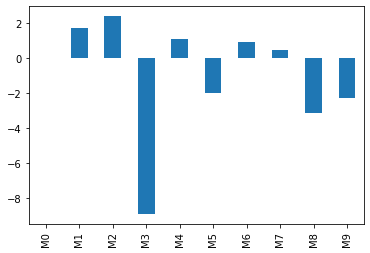

In [362]:
Change(data14)
data14['Percent Change'].plot(kind = 'bar')


# M2 (SF-VF2) maximum,SF-VF3(minimum)

# 5.Flexure Strength

In [363]:
data15 = pd.DataFrame({
"S1":[9.003,9.48,9.003,10.203,9.603,9.303,9.003,9.003,8.103,8.559],
"S2":[8.703,9.903,8.25,11.28,8.103,9.003,9.162,8.94,8.859,8.562],
"S3":[8.403,9.75,10.803,13.503,8.403,9.303,8.703,8.703,7.95,7.68],
"Average":[8.703,9.711,9.352,11.662,8.703,9.203,8.956,8.882,8.304,8.267],
"SD":[0.3,0.214179831,1.31179381,1.682837782,0.793725393,0.173205081,0.233081531,0.158186599,0.486693949,0.508359125]
  },
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data15.head()


,S1,S2,S3,Average,SD
M0,9.003,8.703,8.403,8.703,0.300000
M1,9.480,9.903,9.750,9.711,0.214180
M2,9.003,8.250,10.803,9.352,1.311794
M3,10.203,11.280,13.503,11.662,1.682838
M4,9.603,8.103,8.403,8.703,0.793725


# VF1 - SF,VF2-SF,VF3-SF

In [364]:
SF15= (data15['Average']['M1'] + data15['Average']['M2'] + data15['Average']['M3'])/3
SF15

10.241666666666667

In [365]:
DPE15= (data15['Average']['M4'] + data15['Average']['M5'] + data15['Average']['M6'])/3
DPE15

8.953999999999999

In [366]:
PPE15= (data15['Average']['M7'] + data15['Average']['M8'] + data15['Average']['M9'])/3
PPE15

8.484333333333334

# PPE< DPE< SF(Overall)

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

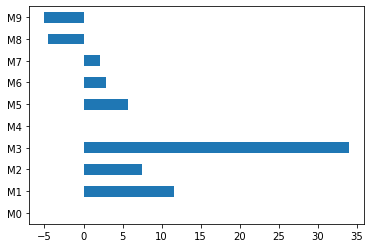

In [367]:
Change(data15)
data15['Percent Change'].plot(kind = 'barh')


# M3(SF-VF3) maximum and M9(PPE-VF3)

In [368]:
train1 = (data11['Average'],data12['Average'],data13['Average'],data14['Average'],data15['Average'])

In [369]:
D1 = pd.DataFrame(train1,columns=['M0','M1','M2','M3','M4','M5','M6','M7','M8','M9'],index =['CS','D','WA','USPV','FS'])

In [370]:
DT2 = D1.T

In [371]:
C =DT2.corr()

<AxesSubplot:>

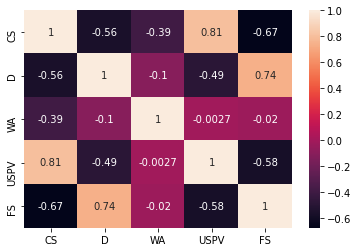

In [372]:
# plot the heatmap
sns.heatmap(C, 
        xticklabels=C.columns,
        yticklabels=C.columns,annot=True)

# Across the samples trend of attributes (match)CS-D(-),CS-USPV(+)(anomaly),CS-FS(-),(match)D-FS(+),WA least correlated amongst all features,USPV-FS(-).



In [373]:
dataF1 = pd.DataFrame({
"SF":[SF11,SF12,SF13,SF14,SF15],
"DPE":[DPE11,DPE12,DPE13,DPE14,DPE15],
"PPE":[PPE11,PPE12,PPE13,PPE14,PPE15],
},
index =['CS','D','WA','USPV','FS'])
dataF1.head()


,SF,DPE,PPE
CS,69.200000,68.666667,70.200000
D,2462.066667,2444.066667,2413.300000
WA,1.593469,1.726772,1.639671
USPV,4.549539,4.623601,4.547003
FS,10.241667,8.954000,8.484333


In [374]:
dataF2= dataF1.T

<AxesSubplot:>

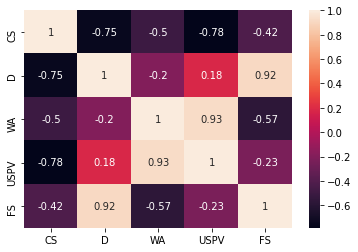

In [375]:
corr2 = dataF2.corr()

# plot the heatmap
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns,annot=True)

[3.5557465226494087, 4.666758332433058, 7.465395725166438]
[7.39836693692151, 2.5405183198184855, 4.039929867378062]
[6.0232881385502415, 5.17223678241177, 1.948495145832628]


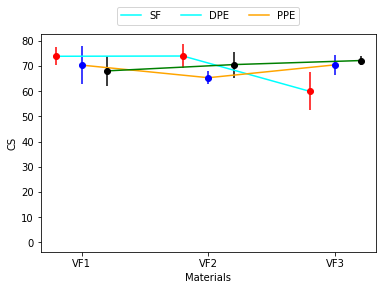

[10.718830782008524, 3.6041642581879216, 22.04812917233564]
[15.901677060402433, 5.963220606350167, 31.56437865696078]
[12.619033243478022, 26.14007141025701, 45.22491938448689]


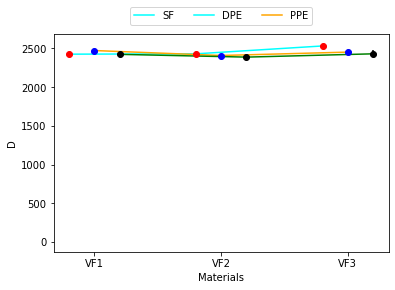

[0.0252001192731879, 0.03869399668274642, 0.030702413645666848]
[0.0207359718804694, 0.027172631939113526, 0.16452109493431266]
[0.011942636432953863, 0.07260553300927167, 0.0862900633183854]


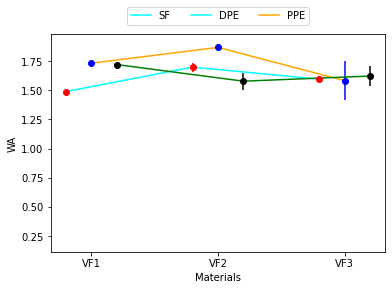

[0.07785547914565835, 0.09094460315113413, 0.17695333168435082]
[0.021836524470678825, 0.0518051921123439, 0.02521455479778883]
[0.049502723953200566, 0.050351919033674745, 0.06514175971962173]


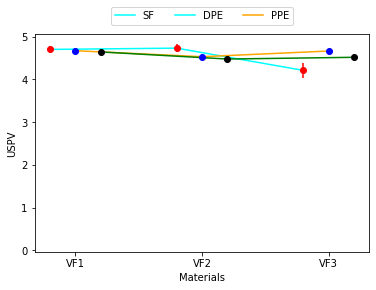

[0.21417983098321838, 1.3117938100174131, 1.682837781843515]
[0.7937253933193771, 0.17320508075688812, 0.23308153079984764]
[0.158186598673845, 0.4866939490069708, 0.5083591250287535]


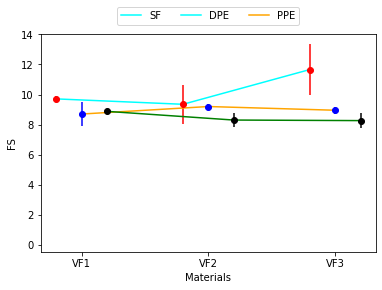

([9.711, 9.352, 11.662], [8.703, 9.203, 8.956], [8.882, 8.304, 8.267])

In [376]:
plot(data11,0,Iall)
plot(data12,1,Iall)
plot(data13,2,Iall)
plot(data14,3,Iall)
plot(data15,4,Iall)


# Across the materials (SF,DPE,PPE): CS-D(-),USPV-CS(-),D-FS(+),WA-USPV(+)



# Test 3:WET DRY

# 1. Comp Strength

In [377]:
data21 = pd.DataFrame({
"S1":[62,58.21,74,67.4,77,64.4,77.41,71.14,67.2,76.51],
"S2":[58.9,68.1,74.6,69.5,68.24,72.63,78.91,67.36,71.6,70.14],
"S3":[74.4,63.92,62,71.82,69.4,63.9,70.52,67.05,64.5,67.61],
"Average":[60.5,63.4,74.3,69.6,71.5,67.0,75.6,68.5,67.8,71.4],
"SD":[8.201829064,4.964685287,7.107742258,2.210912331,4.758206945,4.90230898,4.47426344,2.277154657,3.583759665,4.585989533]
  },
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data21.head()


,S1,S2,S3,Average,SD
M0,62.00,58.90,74.40,60.5,8.201829
M1,58.21,68.10,63.92,63.4,4.964685
M2,74.00,74.60,62.00,74.3,7.107742
M3,67.40,69.50,71.82,69.6,2.210912
M4,77.00,68.24,69.40,71.5,4.758207


In [378]:
 data21.loc['M0','S3'] = data21['Average']['M0']

In [379]:
mean(data21.loc[ 'M0', ['S1','S2']])

60.45

In [380]:
mean(data21.loc[ 'M2', ['S1','S2']])

74.3

In [381]:
data21.loc['M2','S3'] = data21['Average']['M2']

<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

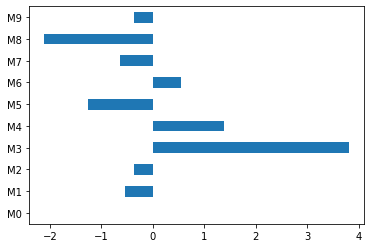

In [382]:
Change(data21)
data12['Percent Change'].plot(kind = 'barh')


# M3(SF-VF3)- maximum while M8(PPE-VF2) minimum

# VF1-DPE,VF2-SF,VF3-DPE(across Volume fractions)

In [383]:
SF21= (data21['Average']['M1'] + data21['Average']['M2'] + data21['Average']['M3'])/3
SF21

69.1

In [384]:
DPE21= (data21['Average']['M4'] + data21['Average']['M5'] + data21['Average']['M6'])/3
DPE21

71.36666666666666

In [385]:
PPE21= (data21['Average']['M7'] + data21['Average']['M8'] + data21['Average']['M9'])/3
PPE21

69.23333333333333

# SF< PPE< DPE(overall)

# 2.Density

In [386]:
data22 =pd.DataFrame({
"S1":[2490.0,2497.6,2476.0,2600.6,2531.8,2524.1,2503.3,2495.0,2494.7,2568.8],
"S2":[2504.0,2518.7,2480.7,2583.3,2602.1,2450.1,2538.8,2515.7,2521.3,2558.3],
"S3":[2502.1,2470.8,2496.6,2621.0,2514.9,2488.3,2466.3,2520.3,2474.3,2508.4],
"Average":[2498.7,2495.7,2484.4,2601.6,2549.6,2487.5,2502.8,2510.3,2496.8,2545.2]},
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data22.head()       


,S1,S2,S3,Average
M0,2490.0,2504.0,2502.1,2498.7
M1,2497.6,2518.7,2470.8,2495.7
M2,2476.0,2480.7,2496.6,2484.4
M3,2600.6,2583.3,2621.0,2601.6
M4,2531.8,2602.1,2514.9,2549.6


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

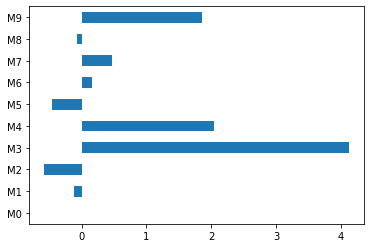

In [387]:
Change(data22)
data22['Percent Change'].plot(kind = 'barh')


# M3(SF-VF3) maximum while M2(SF-VF2) minimum

In [388]:
data22

,S1,S2,S3,Average,Percent Change
M0,2490.0,2504.0,2502.1,2498.7,0.0
M1,2497.6,2518.7,2470.8,2495.7,-0.120062
M2,2476.0,2480.7,2496.6,2484.4,-0.572298
M3,2600.6,2583.3,2621.0,2601.6,4.118141
M4,2531.8,2602.1,2514.9,2549.6,2.037059
M5,2524.1,2450.1,2488.3,2487.5,-0.448233
M6,2503.3,2538.8,2466.3,2502.8,0.164085
M7,2495.0,2515.7,2520.3,2510.3,0.464241
M8,2494.7,2521.3,2474.3,2496.8,-0.07604
M9,2568.8,2558.3,2508.4,2545.2,1.860968


# VF1(DPE),VF2(PPE),VF3(SF) - Across volume fractions

In [389]:
SF22= (data22['Average']['M1'] + data22['Average']['M2'] + data22['Average']['M3'])/3
SF22

2527.2333333333336

In [390]:
DPE22= (data22['Average']['M4'] + data22['Average']['M5'] + data22['Average']['M6'])/3
DPE22

2513.3

In [391]:
PPE22= (data22['Average']['M7'] + data22['Average']['M8'] + data22['Average']['M9'])/3
PPE22

2517.4333333333334

# DPE< PPE< SF(Overall)

# 3.Water Absorption

In [392]:
data23 =pd.DataFrame({
"S1":[1.171762182,1.758223616,1.435705368,1.223265725,1.332735572,1.377140289,1.165867372,0.973084886,0.92669204,1.023890785],
"S2":[1.245785708,1.26995794,1.517860856,1.213206046,1.201818541,1.669837244,1.175704813,1.04299265,0.878734622,1.15501777],
"S3":[1.264675592,1.345216776,1.444715817,1.162062759,1.31956397,1.504822082,1.294744859,0.938947886,0.922909881,1.123409879],
"Average":[1.227407827,1.457799444,1.476783112,1.218235886,1.267277057,1.523488766,1.170786092,1.008038768,0.902713331,1.089454277]},
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data23.head()       


,S1,S2,S3,Average
M0,1.171762,1.245786,1.264676,1.227408
M1,1.758224,1.269958,1.345217,1.457799
M2,1.435705,1.517861,1.444716,1.476783
M3,1.223266,1.213206,1.162063,1.218236
M4,1.332736,1.201819,1.319564,1.267277


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

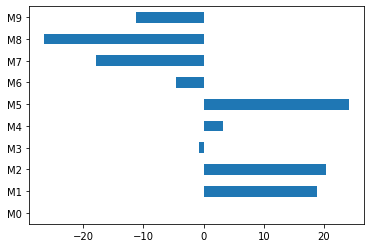

In [393]:
Change(data23)
data23['Percent Change'].plot(kind = 'barh')


# M5(DPE-VF2) maximum while M8(PPE-VF2) is minimum

# VF1-SF,VF2-DPE,VF3-SF

In [394]:
SF23= (data23['Average']['M1'] + data23['Average']['M2'] + data23['Average']['M3'])/3
SF23

1.3842728139999998

In [395]:
DPE23= (data23['Average']['M4'] + data23['Average']['M5'] + data23['Average']['M6'])/3
DPE23

1.320517305

In [396]:
PPE23= (data23['Average']['M7'] + data23['Average']['M8'] + data23['Average']['M9'])/3
PPE23

1.000068792

# PPE< DPE< SF(overall)

# 4.USPV

In [397]:
data24 =pd.DataFrame({
"S1":[4.739336493,4.739336493,4.651162791,4.032258065,4.761904762,4.694835681,4.784688995,4.672897196,4.739336493,4.694835681],
"S2":[4.784688995,4.761904762,4.62962963,4.366812227,4.926108374,4.716981132,4.87804878,4.716981132,4.62962963,4.784688995],
"S3":[4.807692308,4.926108374,4.716981132,4.504504505,4.854368932,4.484304933,4.87804878,4.587155963,4.694835681,4.807692308],
"Average":[4.777239265,4.809116543,4.665924517,4.301191599,4.847460689,4.632040582,4.846928852,4.659011431,4.687933934,4.762405661],
"SD":[0.034781507,0.101944338,0.04550827,0.242865653,0.082319496,0.128421072,0.053901297,0.066017077,0.055178116,0.059636942]},
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data24.head()       


,S1,S2,S3,Average,SD
M0,4.739336,4.784689,4.807692,4.777239,0.034782
M1,4.739336,4.761905,4.926108,4.809117,0.101944
M2,4.651163,4.629630,4.716981,4.665925,0.045508
M3,4.032258,4.366812,4.504505,4.301192,0.242866
M4,4.761905,4.926108,4.854369,4.847461,0.082319


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

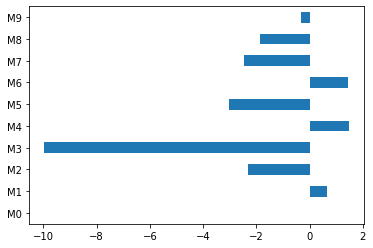

In [398]:
Change(data24)
data24['Percent Change'].plot(kind = 'barh')


# M4 is maximum while M3 is minimum.

#  DPE(VF1),SF(VF2),DPE(VF3)

In [399]:
SF24= (data24['Average']['M1'] + data24['Average']['M2'] + data24['Average']['M3'])/3
SF24

4.592077552999999

In [400]:
DPE24= (data24['Average']['M4'] + data24['Average']['M5'] + data24['Average']['M6'])/3
DPE24

4.775476707666667

In [401]:
PPE24= (data24['Average']['M7'] + data24['Average']['M8'] + data24['Average']['M9'])/3
PPE24

4.703117008666666

# SF < PPE< DPE(overall)

# 5.. Flexure strength

In [402]:
data25 = pd.DataFrame({
"S1":[6.603,8.67,9.003,12.303,7.503,9.18,7.203,10.146,9.183,8.703],
"S2":[7.503,9.303,6.903,12.603,8.703,10.203,6.603,9.48,8.403,9.303],
"S3":[8.403,8.703,9.603,11.703,7.503,8.703,7.503,9.603,9.303,8.703],
"Average":[7.503,8.892,9.303,12.203,7.903,9.362,7.103,9.743,8.963,8.903],
"SD":[0.9,0.356318678,0.424264069,0.458257569,0.692820323,0.766383063,0.458257569,0.354385383,0.488671669,0.346410162]},
index =["M0","M1","M2","M3","M4","M5","M6","M7","M8","M9"])
data25.head()       


,S1,S2,S3,Average,SD
M0,6.603,7.503,8.403,7.503,0.900000
M1,8.670,9.303,8.703,8.892,0.356319
M2,9.003,6.903,9.603,9.303,0.424264
M3,12.303,12.603,11.703,12.203,0.458258
M4,7.503,8.703,7.503,7.903,0.692820


<ipython-input-290-15cafe7021ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percent Change'][i] = (( dataset['Average'][i]-dataset['Average'][0])/ dataset['Average'][0])*100


<AxesSubplot:>

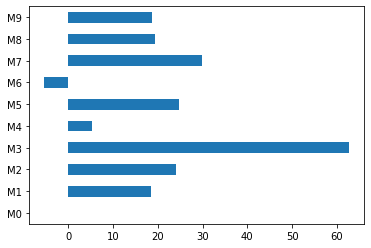

In [403]:
Change(data25)
data25['Percent Change'].plot(kind = 'barh')


# M3(SF-VF3) is maximum while M6(DPE-VF3) is minimum

# VF1-DPE,VF2-PPE,VF3-DPE

In [404]:
SF25= (data25['Average']['M1'] + data25['Average']['M2'] + data25['Average']['M3'])/3
SF25

10.132666666666667

In [405]:
DPE25= (data25['Average']['M4'] + data25['Average']['M5'] + data25['Average']['M6'])/3
DPE25

8.122666666666667

In [406]:
PPE25= (data25['Average']['M7'] + data25['Average']['M8'] + data25['Average']['M9'])/3
PPE25

9.203000000000001

# DPE< PPE< SF(Overall)

In [407]:
train1 = (data21['Average'],data22['Average'],data23['Average'],data24['Average'],data25['Average'])

In [408]:
D2 = pd.DataFrame(train1,columns=['M0','M1','M2','M3','M4','M5','M6','M7','M8','M9'],index =['CS','D','WA','USPV','FS'])

In [409]:
DT3 = D2.T

In [410]:
C1 =DT3.corr()

<AxesSubplot:>

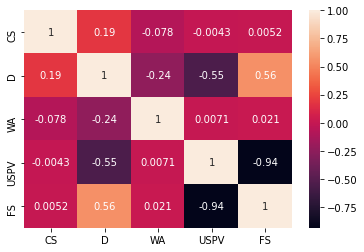

In [411]:
 sns.heatmap(C1, 
  xticklabels=C1.columns,
  yticklabels=C1.columns,annot=True)

# USPV - FS(-) across the attributes in the dataset 

In [412]:
dataF1 = pd.DataFrame({
"SF":[SF21,SF22,SF23,SF24,SF25],
"DPE":[DPE21,DPE22,DPE23,DPE24,DPE25],
"PPE":[PPE21,PPE22,PPE23,PPE24,PPE25],
},
index =['CS','D','WA','USPV','FS'])
dataF1.head()


,SF,DPE,PPE
CS,69.100000,71.366667,69.233333
D,2527.233333,2513.300000,2517.433333
WA,1.384273,1.320517,1.000069
USPV,4.592078,4.775477,4.703117
FS,10.132667,8.122667,9.203000


In [413]:
dataF1T = dataF1.T

In [414]:
Co = dataF1T.corr()

<AxesSubplot:>

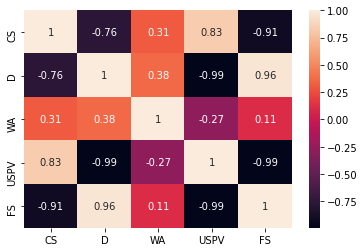

In [415]:
sns.heatmap(Co, 
        xticklabels=Co.columns,
        yticklabels=Co.columns,annot=True)

[4.964685287105314, 0.29999999999999716, 2.210912330539885]
[4.7582069451983, 4.90230897979037, 4.47426344031432]
[2.277154657315427, 3.583759664560852, 4.5859895333504666]


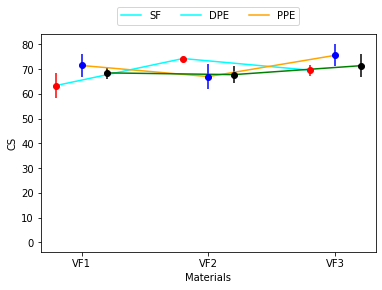

[24.006457464607124, 10.795523763733417, 18.871230307887455]
[46.24489160977663, 37.00648591801173, 36.25258611464843]
[13.476770137289355, 23.568057478997588, 32.27078141807751]


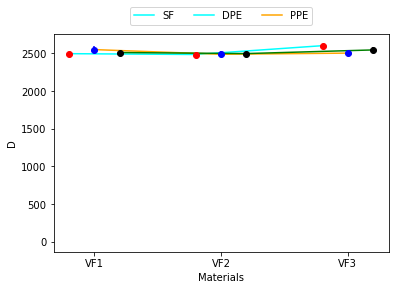

[0.26288207516000955, 0.04505720277234863, 0.032819293090966595]
[0.0720841477666847, 0.1467447622119515, 0.07173645569321284]
[0.05303731886180927, 0.026663558701109587, 0.06843171175125229]


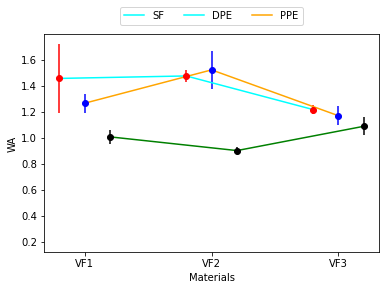

[0.10194433815550286, 0.04550827019399907, 0.24286565244493552]
[0.08231949593515361, 0.12842107202124878, 0.05390129700123589]
[0.06601707727991168, 0.05517811635206865, 0.05963694143674113]


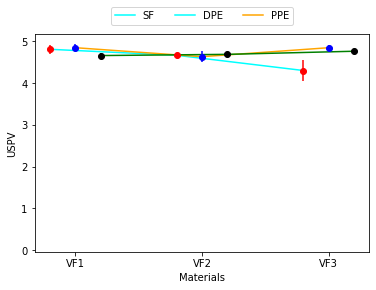

[0.3563186775907214, 1.4177446878757827, 0.4582575694955843]
[0.6928203230275505, 0.7663830634871832, 0.4582575694955842]
[0.3543853834457627, 0.4886716689148246, 0.3464101615137763]


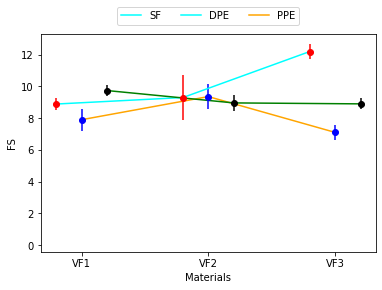

([8.892, 9.303, 12.203], [7.903, 9.362, 7.103], [9.743, 8.963, 8.903])

In [416]:
plot(data21,0,Iall)
plot(data22,1,Iall)
plot(data23,2,Iall)
plot(data24,3,Iall)
plot(data25,4,Iall)


# Error bar to account for sample variablity

# CS-D(-),CS-USPV(+),D-USPV(-) ,D-FS(+) trend across grouped data.


# CS-D(-),CS-USPV(+),D-USPV(-) ,D-FS(+) trend across grouped data(Wet Dry)

# Across the materials (SF,DPE,PPE): CS-D(-),USPV-CS(-),D-FS(+),WA-USPV(+)(Hot Cool)

# CS-USPV (-), CS-WP(-),D-USPV(+),D-FS(+)(both true), D-WA(+)(anomaly), USPV-WP(+),WA-FS(perfect +)¶ (Water curing)

#  Overall analysis : Density and Flexure Strength have positive correlation

 #Therefore in our further model analysis we can use either of the features to reduce multicollinearity .